In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

MAIN_CSS_PATH = Path("data", "wandb_cross_data_main.csv")
FIX_CSS_PATH = Path("data", "wandb_cross_dataset_restaurant_2.csv")
FAILED_RUN = ["wandering-night-1089", 123, "CONLL03", 0.5809868479124372]

In [16]:
main_df = pd.read_csv(MAIN_CSS_PATH)
main_df = main_df.loc[(main_df["dummy"] < 12) | (main_df["dataset"] != "NER_ENGLISH_RESTAURANT")]
main_df.loc[main_df["test_score"] < 0.001, "test_score"] = 0.5809868479124372
main_df

,Name,dummy,dataset,test_score
8,golden-sweep-52,11,NER_ENGLISH_RESTAURANT,0.446065
9,worthy-sweep-51,10,NER_ENGLISH_RESTAURANT,0.429022
10,twilight-sweep-50,9,NER_ENGLISH_RESTAURANT,0.452088
11,warm-sweep-49,8,NER_ENGLISH_RESTAURANT,0.479047
12,snowy-sweep-48,7,NER_ENGLISH_RESTAURANT,0.430276
13,vivid-sweep-47,6,NER_ENGLISH_RESTAURANT,0.461627
14,firm-sweep-46,5,NER_ENGLISH_RESTAURANT,0.433534
15,ruby-sweep-45,4,NER_ENGLISH_RESTAURANT,0.439645
16,wise-sweep-44,3,NER_ENGLISH_RESTAURANT,0.503736
17,grateful-sweep-43,2,NER_ENGLISH_RESTAURANT,0.470990


In [18]:
restaurant_df = pd.read_csv(FIX_CSS_PATH)
restaurant_df["dummy"] = restaurant_df["dummy"] + 12
restaurant_df

,Name,dummy,dataset,test_score
0,clean-sweep-8,19,NER_ENGLISH_RESTAURANT,0.467263
1,toasty-sweep-7,18,NER_ENGLISH_RESTAURANT,0.482847
2,sage-sweep-6,17,NER_ENGLISH_RESTAURANT,0.458747
3,fragrant-sweep-5,16,NER_ENGLISH_RESTAURANT,0.429943
4,decent-sweep-4,15,NER_ENGLISH_RESTAURANT,0.418550
5,rich-sweep-3,14,NER_ENGLISH_RESTAURANT,0.416005
6,spring-sweep-2,13,NER_ENGLISH_RESTAURANT,0.437919
7,sweepy-sweep-1,12,NER_ENGLISH_RESTAURANT,0.445449


In [36]:
df = pd.concat([main_df, restaurant_df])
df.loc[df["dataset"] == "NER_ENGLISH_RESTAURANT", "dataset"] = "MIT ENGLISH RESTAURANT"
df.loc[df["dataset"] == "CONLL03", "dataset"] = "CONLL 2003"
df.loc[df["dataset"] == "WNUT17", "dataset"] = "WNUT 2017"
df

,Name,dummy,dataset,test_score
8,golden-sweep-52,11,MIT ENGLISH RESTAURANT,0.446065
9,worthy-sweep-51,10,MIT ENGLISH RESTAURANT,0.429022
10,twilight-sweep-50,9,MIT ENGLISH RESTAURANT,0.452088
11,warm-sweep-49,8,MIT ENGLISH RESTAURANT,0.479047
12,snowy-sweep-48,7,MIT ENGLISH RESTAURANT,0.430276
13,vivid-sweep-47,6,MIT ENGLISH RESTAURANT,0.461627
14,firm-sweep-46,5,MIT ENGLISH RESTAURANT,0.433534
15,ruby-sweep-45,4,MIT ENGLISH RESTAURANT,0.439645
16,wise-sweep-44,3,MIT ENGLISH RESTAURANT,0.503736
17,grateful-sweep-43,2,MIT ENGLISH RESTAURANT,0.470990


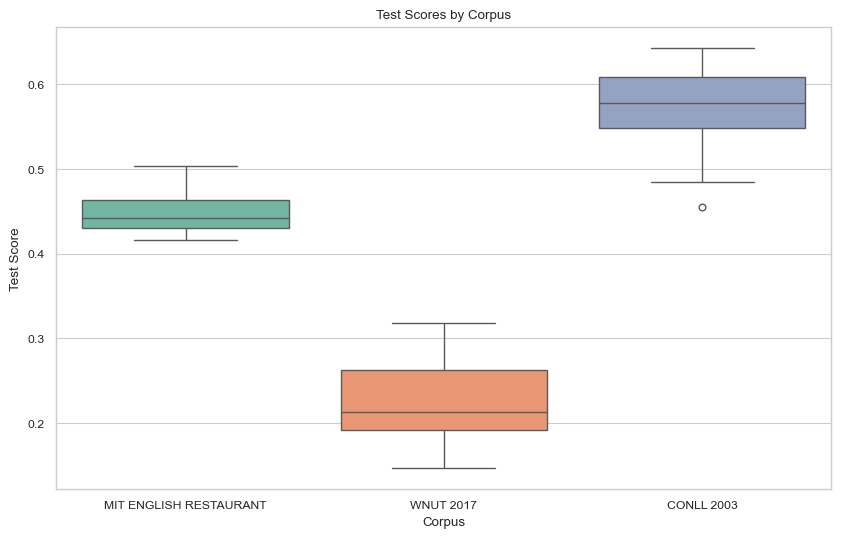

In [39]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='dataset', y='test_score', data=df, hue='dataset')

plt.title('Test Scores by Corpus')
plt.xlabel('Corpus')
plt.ylabel('Test Score')

save_path = Path(os.getcwd(), "output_figs", "cross_corpus_performance.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [42]:
# Group the DataFrame by 'dataset' and calculate statistics for 'test_score'
stats = df.groupby('dataset')['test_score'].agg(['max', 'min', 'median', 'mean', 'std'])

# Rename the columns for clarity
stats.columns = ['Highest Score', "Lowest Score", 'Median Score', 'Mean Score', 'Standard Deviation']

# Round the results to 4 decimal places
stats = stats.round(4)
stats

,Highest Score,Lowest Score,Median Score,Mean Score,Standard Deviation
dataset,,,,,
CONLL 2003,0.6429,0.4546,0.5783,0.5742,0.0514
MIT ENGLISH RESTAURANT,0.5037,0.4160,0.4425,0.4475,0.0240
WNUT 2017,0.3181,0.1469,0.2129,0.2278,0.0496


In [43]:
print(stats.style.format(precision=4).to_latex())

\begin{tabular}{lrrrrr}
 & Highest Score & Lowest Score & Median Score & Mean Score & Standard Deviation \\
dataset &  &  &  &  &  \\
CONLL 2003 & 0.6429 & 0.4546 & 0.5783 & 0.5742 & 0.0514 \\
MIT ENGLISH RESTAURANT & 0.5037 & 0.4160 & 0.4425 & 0.4475 & 0.0240 \\
WNUT 2017 & 0.3181 & 0.1469 & 0.2129 & 0.2278 & 0.0496 \\
\end{tabular}

